In [1]:
!pip install torch torchvision torchaudio
!pip install opencv-python numpy matplotlib
!pip install git+https://github.com/facebookresearch/detectron2.git



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00a 0:00:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 23.6 MB/s eta 0:00:0000:0100:01
  Cloning https://github.com/facebookresearch/detectron2.git to /private/var/folders/fn/n24r_40d1bs4flqc0xfjg4380000gn/T/pip-req-build-7q60npa5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /private/var/folders/fn/n24r_40d1bs4flqc0xfjg4380000gn/T/pip-req-build-7q60npa5
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


In [4]:
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))  # Load config from Detectron2 model zoo

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Detection threshold
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Load pretrained weights

cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
predictor = DefaultPredictor(cfg)



model_final_f10217.pkl: 178MB [00:05, 35.2MB/s]                                 


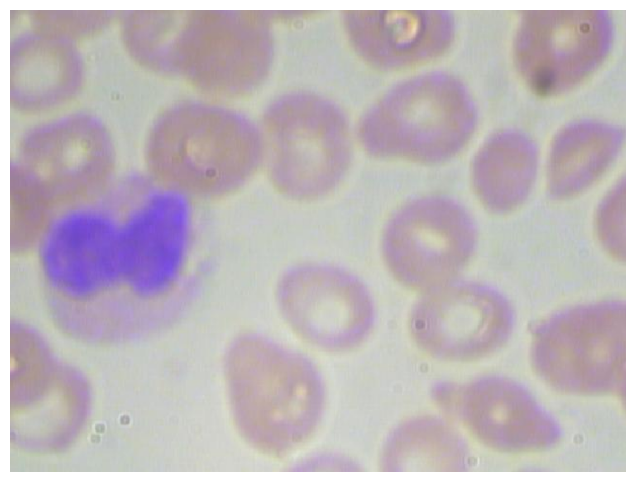

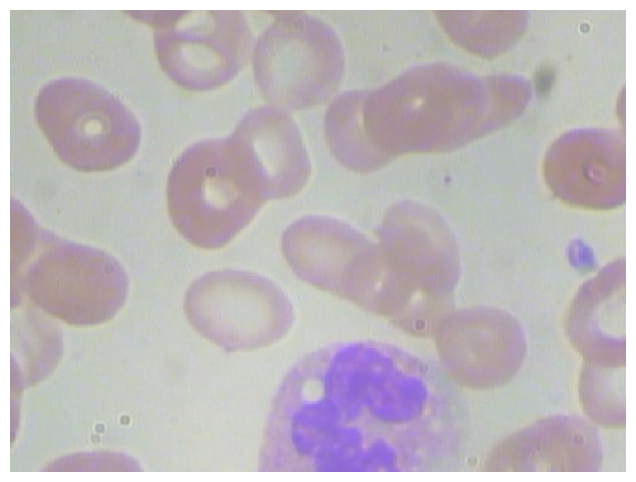

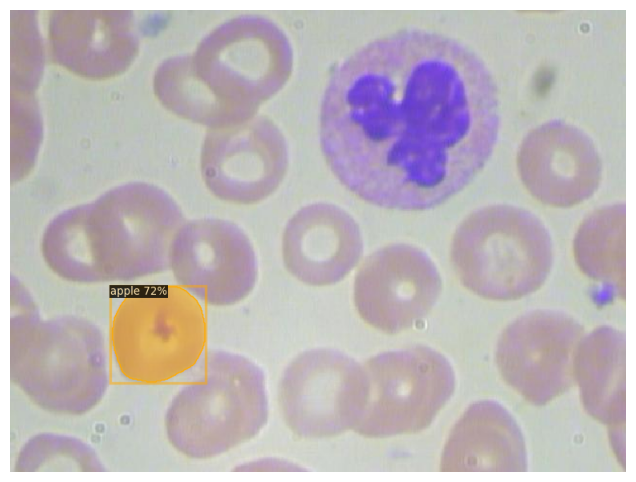

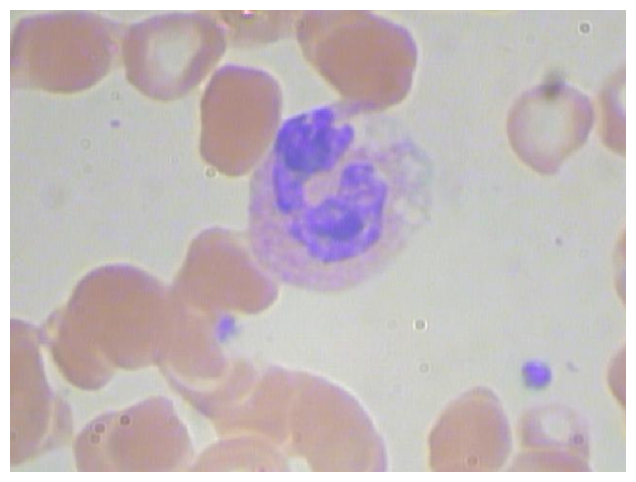

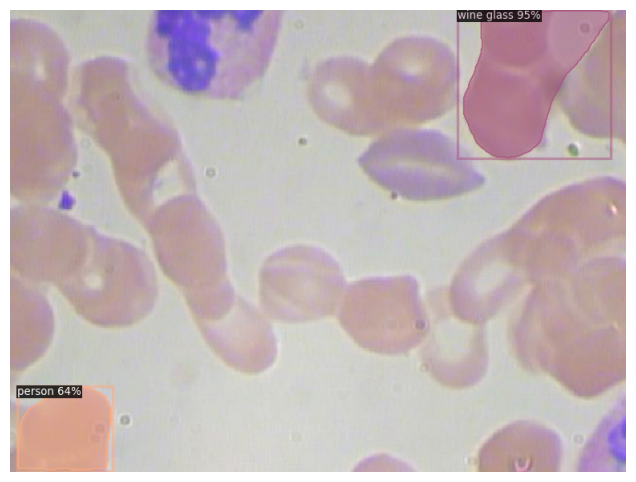

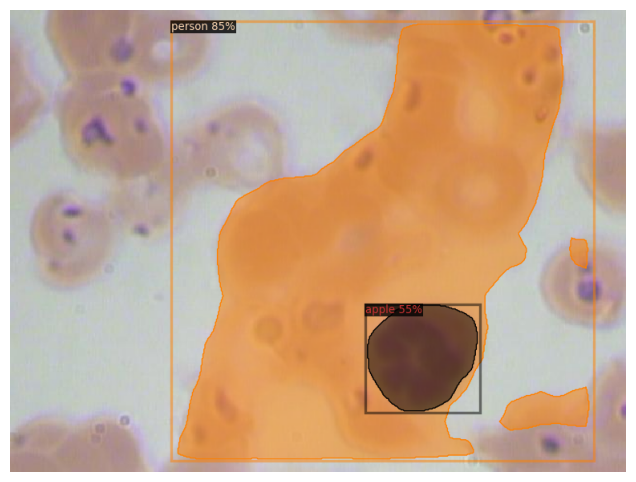

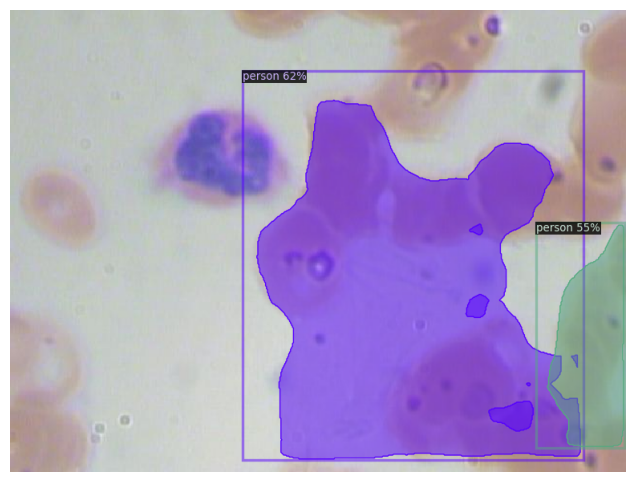

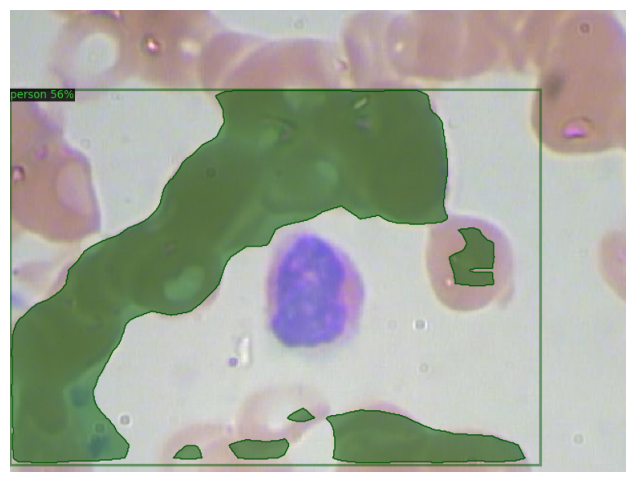

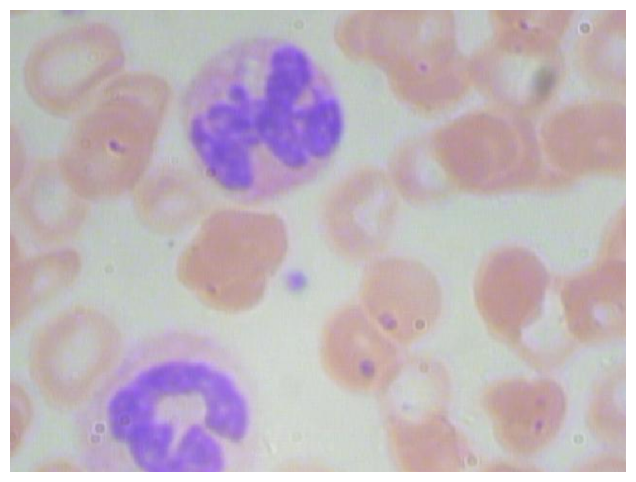

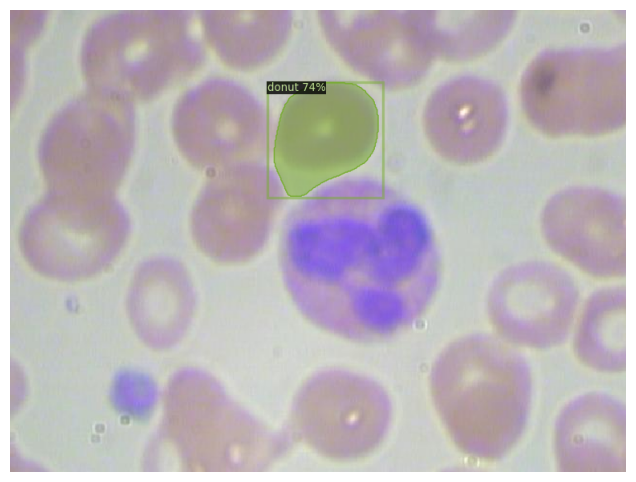

In [8]:
# Path to your Blood Cell dataset (Update this path based on where you saved it)
dataset_path = "/Users/uv/Desktop/deepLearning/dataset-master/JPEGImages"  # Update this path
image_paths = glob.glob(f"{dataset_path}/*.jpg")[:10]  # Select 10 images

# Loop through images and make predictions
for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert OpenCV BGR format to RGB

    # Make prediction
    outputs = predictor(img)

    # Visualize results
    v = Visualizer(img, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(v.get_image())
    plt.axis("off")
    plt.show()
